In [2]:
import pandas as pd

In [49]:
df = pd.read_csv("../datasets/weatherAUS.csv")

In [50]:
df.shape

(56420, 23)

In [51]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [52]:
df.isna().sum().sum()

0

Simplifying

Drop some columns

In [53]:
df.RainToday = df.RainToday.map({"No": 0, "Yes": 1})

In [54]:
df.RainTomorrow = df.RainTomorrow.map({"No": 0, "Yes": 1})

In [55]:
df = df.drop(list(df.dtypes[df.dtypes == object].index), axis=1)

In [56]:
df.shape

(56420, 18)

In [57]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [58]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


In [59]:
import seaborn as sns

/home/sheriff/miniconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

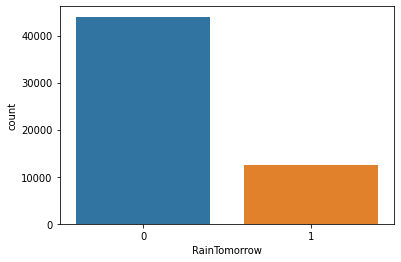

In [60]:
sns.countplot(df.RainTomorrow)

### Build predictive model for RainTomorrow

Use case objective: guess correctly next day's rain.  
We consider a symmetric error, considering equally bad predictions:
 * positive on sunny days
 * negative on rainy days

So we will use **ACCURACY** metric

We should assess the quality of our model with UNSEEN data, so we artificially create a test set, which will NOT be used for training

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = df.drop("RainTomorrow", axis=1)
y = df.RainTomorrow

In [68]:
X.shape

(56420, 17)

In [69]:
y.shape

(56420,)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [90]:
X_train.shape

(45136, 17)

In [91]:
X_test.shape

(11284, 17)

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
log = LogisticRegression(max_iter=10000)

In [94]:
%%time
log.fit(X_train, y_train)

CPU times: user 1min 13s, sys: 1min 9s, total: 2min 22s
Wall time: 15.1 s


LogisticRegression(max_iter=10000)

In [97]:
# default logistic regression score is ACCURACY
log.score(X_train, y_train)

0.8524459411556186

In [98]:
# default logistic regression score is ACCURACY
log.score(X_test, y_test)

0.8552818149592343

Surprise. In general, test score is lower than train score!